# Predict changes in bond and stock prices

Mean Squared Error: 3.021950810527878e-05
R-squared: 0.8938480402709467
             Feature  Importance
1          PX_VOLUME    0.402846
2     VOLATILITY_10D    0.247399
3     VOLATILITY_30D    0.161356
0         LAST_PRICE    0.151976
5  TEXTBLOB_POLARITY    0.026779
6            MENTION    0.005070
4      LSTM_POLARITY    0.004575


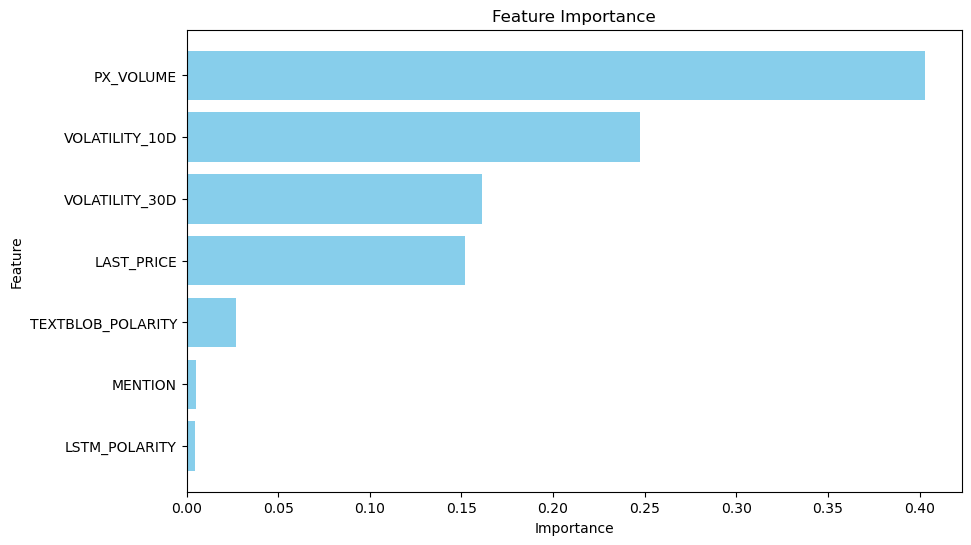

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('reduded_dataset_cleaned.csv')

data['DATE'] = pd.to_datetime(data['DATE'])

features = [
    'LAST_PRICE', 'PX_VOLUME', 'VOLATILITY_10D', 'VOLATILITY_30D',
    'LSTM_POLARITY', 'TEXTBLOB_POLARITY', 'MENTION'
]
target = '1_DAY_RETURN'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# import joblib
# joblib.dump(rf_model, 'random_forest_model.pkl')


Best Parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': None, 'regressor__bootstrap': True}
Mean Squared Error: 2.9528474167042753e-05
R-squared: 0.8962754327528986
             Feature  Importance
1          PX_VOLUME    0.406453
2     VOLATILITY_10D    0.246105
3     VOLATILITY_30D    0.163256
0         LAST_PRICE    0.152925
5  TEXTBLOB_POLARITY    0.023813
6            MENTION    0.004154
4      LSTM_POLARITY    0.003294


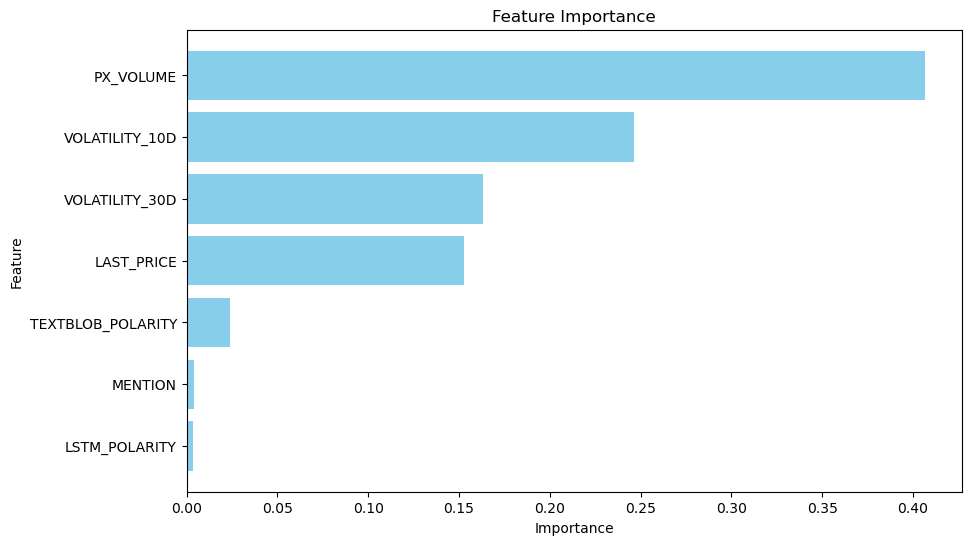

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('reduded_dataset_cleaned.csv')

data['DATE'] = pd.to_datetime(data['DATE'])

features = [
    'LAST_PRICE', 'PX_VOLUME', 'VOLATILITY_10D', 'VOLATILITY_30D',
    'LSTM_POLARITY', 'TEXTBLOB_POLARITY', 'MENTION'
]

target = '1_DAY_RETURN'

X = data[features]
y = data[target]

numeric_features = ['LAST_PRICE', 'PX_VOLUME', 'VOLATILITY_10D', 'VOLATILITY_30D', 'LSTM_POLARITY', 'TEXTBLOB_POLARITY', 'MENTION']
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_distributions = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=10, cv=3, scoring='neg_mean_squared_error',
    random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

y_pred = random_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

best_model = random_search.best_estimator_.named_steps['regressor']
feature_importances = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()
# import joblib
# joblib.dump(random_search.best_estimator_, 'optimized_random_forest_model.pkl')


# Predict the effect of events on market movements

Mean Squared Error: 1.3961
R-squared: 0.9937
Feature Importances:
             Feature  Importance
5     VOLATILITY_30D    0.809552
0         LAST_PRICE    0.100276
1          PX_VOLUME    0.088170
3  TEXTBLOB_POLARITY    0.001327
4            MENTION    0.000544
2      LSTM_POLARITY    0.000131


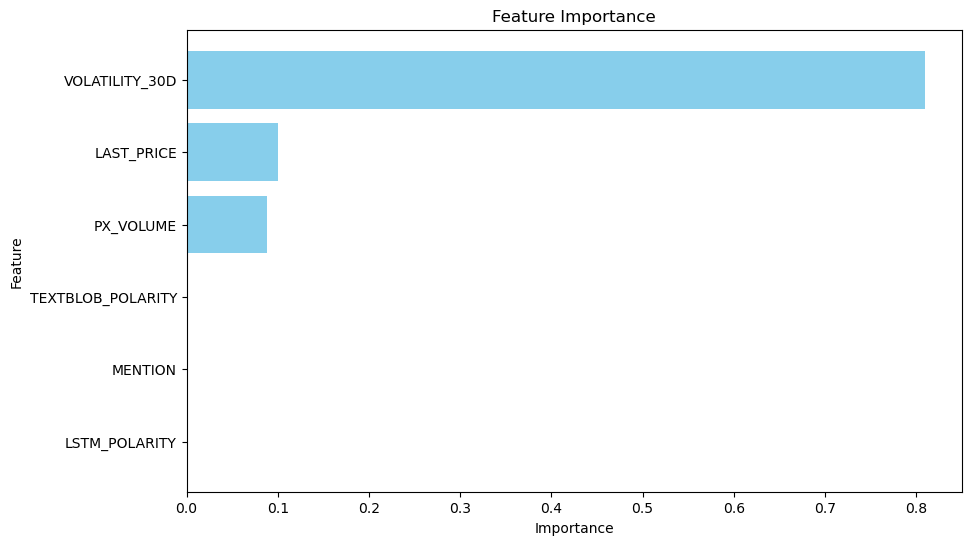

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv("reduded_dataset_cleaned.csv")

data['DATE'] = pd.to_datetime(data['DATE'])

data = data.dropna()

features = [
    "LAST_PRICE", "PX_VOLUME", "LSTM_POLARITY", "TEXTBLOB_POLARITY", "MENTION",
    "VOLATILITY_30D"
]
X = data[features]
y = data["VOLATILITY_10D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# import joblib
# joblib.dump(model, 'random_forest_model.pkl')


Best Model Parameters: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 73}
Mean Squared Error: 3.5077
R-squared: 0.9841
Cross-Validation MSE: 36.3886 (Standard Deviation: 13.1335)
Feature Importances:
             Feature  Importance
2     VOLATILITY_30D    0.622913
0         LAST_PRICE    0.242866
1          PX_VOLUME    0.120865
4  TEXTBLOB_POLARITY    0.008253
5            MENTION    0.003525
3      LSTM_POLARITY    0.001577


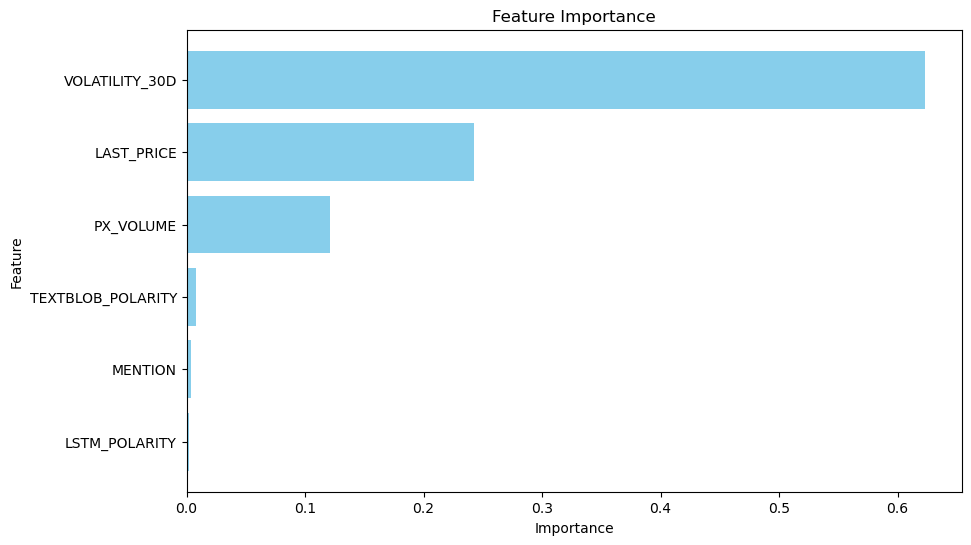

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import randint

data = pd.read_csv("reduded_dataset_cleaned.csv")

data['DATE'] = pd.to_datetime(data['DATE'])

data = data.dropna()

features = [
    "LAST_PRICE", "PX_VOLUME", "LSTM_POLARITY", "TEXTBLOB_POLARITY", "MENTION",
    "VOLATILITY_30D"
]
X = data[features]
y = data["VOLATILITY_10D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ["LAST_PRICE", "PX_VOLUME", "VOLATILITY_30D"]
categorical_features = ["LSTM_POLARITY", "TEXTBLOB_POLARITY", "MENTION"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_dist = {
    'regressor__n_estimators': randint(50, 150),
    'regressor__max_depth': randint(10, 30),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 5),
    'regressor__max_features': ['auto', 'sqrt']
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Model Parameters: {random_search.best_params_}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
print(f"Cross-Validation MSE: {-cv_scores.mean():.4f} (Standard Deviation: {cv_scores.std():.4f})")

feature_importances = best_model.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({
    "Feature": numeric_features + categorical_features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)
print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()